In [1]:
#CSC588 Final Project
#Kukapalini 101063401

####              Labeling The Carbon Dioxide Emissions Data Depending on Different Features By K-Means Clustering and Analysis Different Models Depending on Their Accuracy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [3]:
#load the data
Co2_data =pd.read_csv('CO2 Emissions_Canada.csv')

In [4]:
#Exploring the data
Co2_data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
Co2_data.shape

(7385, 12)

In [6]:
#Check if there is any missing values
Co2_data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [7]:
#Encoding data to convert the string data to numerical value

In [8]:
# Creating a instance of label Encoder.
le = LabelEncoder()
# Using .fit_transform function to fit label
# encoder and return encoded label
Co2_data['Make'] = le.fit_transform(Co2_data['Make'])
Co2_data['Model'] = le.fit_transform(Co2_data['Model'])
Co2_data['Vehicle Class'] = le.fit_transform(Co2_data['Vehicle Class'])
Co2_data['Transmission'] = le.fit_transform(Co2_data['Transmission'])
Co2_data['Fuel Type'] = le.fit_transform(Co2_data['Fuel Type'])

In [9]:
Co2_data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,33,196
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,29,221
2,0,1058,0,1.5,4,22,4,6.0,5.8,5.9,48,136
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,25,255
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,27,244


##### The correlational method 

In [10]:
Co2_data.corr()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Make,1.000000,0.012679,-0.029558,-0.146199,-0.162065,0.181923,0.045368,-0.197389,-0.126010,-0.175238,0.182649,-0.151955
Model,0.012679,1.000000,0.190713,0.070426,0.048399,-0.016260,-0.079554,0.101590,0.161755,0.123675,-0.098375,0.105847
Vehicle Class,-0.029558,0.190713,1.000000,0.142704,0.105978,-0.156562,-0.033560,0.240941,0.329828,0.274388,-0.277606,0.286468
Engine Size(L),-0.146199,0.070426,0.142704,1.000000,0.927653,-0.322389,0.058296,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,-0.162065,0.048399,0.105978,0.927653,1.000000,-0.270011,0.125175,0.800702,0.715252,0.780534,-0.719321,0.832644
Transmission,0.181923,-0.016260,-0.156562,-0.322389,-0.270011,1.000000,0.212872,-0.345839,-0.355371,-0.353609,0.331213,-0.316660
Fuel Type,0.045368,-0.079554,-0.033560,0.058296,0.125175,0.212872,1.000000,-0.075605,-0.129812,-0.095539,-0.016880,0.100306
Fuel Consumption City (L/100 km),-0.197389,0.101590,0.240941,0.831379,0.800702,-0.345839,-0.075605,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),-0.126010,0.161755,0.329828,0.761526,0.715252,-0.355371,-0.129812,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),-0.175238,0.123675,0.274388,0.817060,0.780534,-0.353609,-0.095539,0.993810,0.977299,1.000000,-0.925576,0.918052


<AxesSubplot:>

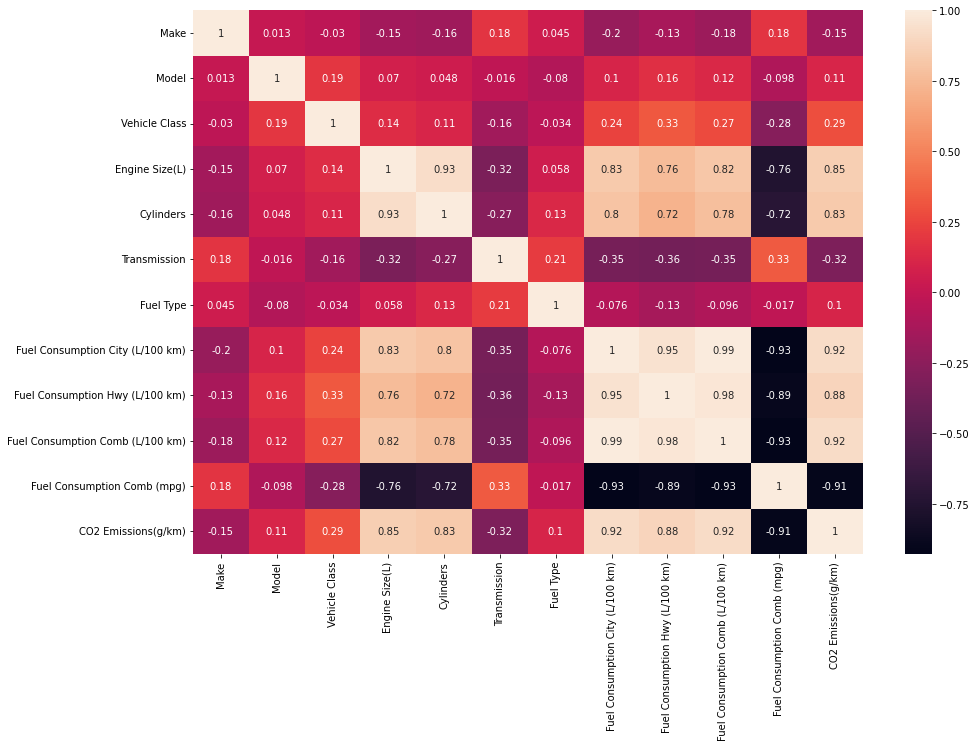

In [11]:
#correlation heatmap
corr = Co2_data.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns,annot = True)

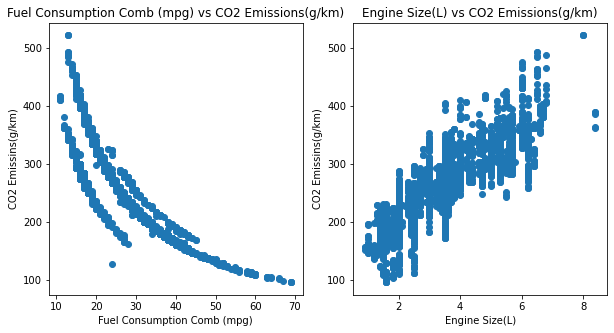

In [12]:
#fig, ax = plt.subplot(1, 2, 1)
#ax.scatter(x=Co2_data["Fuel Consumption Comb (mpg)"],y=Co2_data["CO2 Emissions(g/km)"])

#plt.show()
fig,a =  plt.subplots(1,2,figsize= (10,5))
#x = np.arange(1,5)
a[0].scatter(x=Co2_data["Fuel Consumption Comb (mpg)"],y=Co2_data["CO2 Emissions(g/km)"])
a[0].set_title("Fuel Consumption Comb (mpg) vs CO2 Emissions(g/km)")
a[0].set_xlabel("Fuel Consumption Comb (mpg)")
a[0].set_ylabel("CO2 Emissins(g/km)")
a[1].scatter(x=Co2_data["Engine Size(L)"],y=Co2_data["CO2 Emissions(g/km)"])
a[1].set_title("Engine Size(L) vs CO2 Emissions(g/km)")
a[1].set_xlabel("Engine Size(L)")
a[1].set_ylabel("CO2 Emissins(g/km)")

plt.show()

### Feature selection

In [13]:
# slice the features which we want to use in following part
X = Co2_data.iloc[:, :-1].values

In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


#### Diamentional reduction using PCA 

In [15]:
# Before using prediction model here Applying PCA to dimentional reduction
pca = PCA(n_components =2)
X_pca = pca.fit_transform(X)


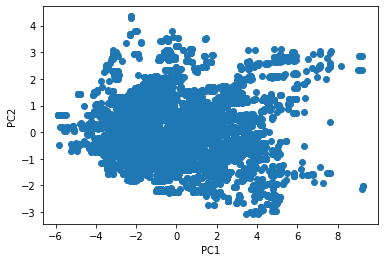

In [16]:
#showing PCA in scatter plot
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

#### Kmeans clustering 

In [17]:
#to find optimal k using the elbow method
#Within Cluster Sum of Squares (WCSS) which measures the squared average distance of all the points
#within a cluster to the cluster centroid.
wcss = []  
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++', n_init=12, random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

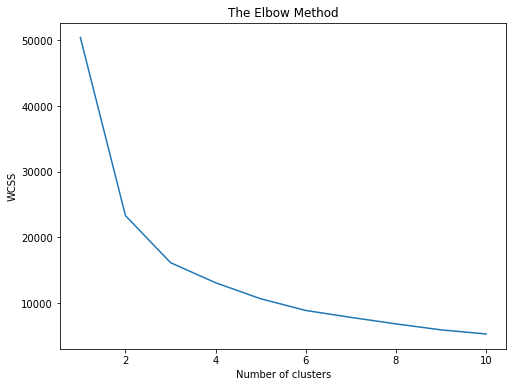

In [18]:
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
#From this elbow graph we can see that the optimal number of cluster is 3
#Applying kmeans to the dataset
Kmeans = KMeans(n_clusters = 3)
clusters = Kmeans.fit_predict(X_pca)

In [20]:
print(Kmeans.cluster_centers_)

[[ 0.30086097 -0.10450605]
 [-2.26653013  0.1249324 ]
 [ 3.48208568 -0.02964161]]


In [21]:
Co2_data_k_mean=Kmeans.labels_

In [22]:
Co2_data_k_mean

array([1, 1, 1, ..., 1, 1, 0])

In [23]:
Co2_data['Kmeans_label']=Co2_data_k_mean

In [24]:
#cluster labels
np.unique(Kmeans.labels_)

array([0, 1, 2])

In [25]:
Co2_data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Kmeans_label
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,33,196,1
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,29,221,1
2,0,1058,0,1.5,4,22,4,6.0,5.8,5.9,48,136,1
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,25,255,0
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,27,244,0


#### Visualizing clustered data

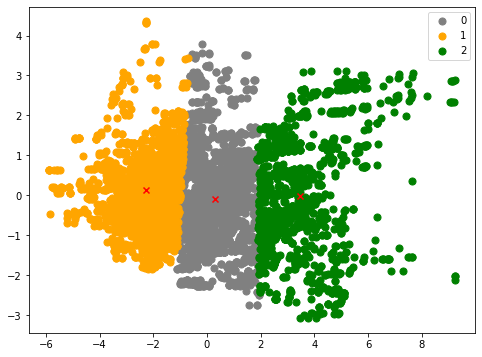

In [26]:
#Visualising the clusters

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(X_pca[Co2_data_k_mean == 0,0], X_pca[Co2_data_k_mean == 0,1], s = 50, c = 'gray',label = '0')
plt.scatter(X_pca[Co2_data_k_mean == 1, 0], X_pca[Co2_data_k_mean == 1, 1], s = 50, c ='orange', label = '1')
plt.scatter(X_pca[Co2_data_k_mean == 2, 0], X_pca[Co2_data_k_mean == 2, 1], s = 50, c = 'green',label = '2')
#Plotting the centroids of the clusters
for i in range(3):
    plt.scatter(Kmeans.cluster_centers_[i][0],Kmeans.cluster_centers_[i][1],marker='x',c = 'red')

plt.legend()

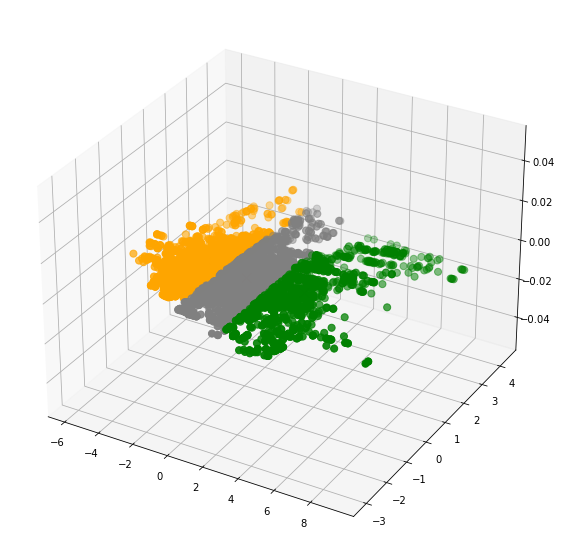

In [27]:
#Visualising the clusters in 3d
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X_pca[Co2_data_k_mean == 0, 0], X_pca[Co2_data_k_mean == 0, 1], s = 50, c ='gray', label = '1')
plt.scatter(X_pca[Co2_data_k_mean == 1, 0], X_pca[Co2_data_k_mean == 1, 1], s = 50, c ='orange', label = '2')
plt.scatter(X_pca[Co2_data_k_mean == 2, 0], X_pca[Co2_data_k_mean == 2, 1], s = 50, c ='green', label = '3')
#Plotting the centroids of the clusters
plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:,1], s =100, marker='x',c = 'red', label = 'Centroids')
plt.show()

###### building models to predict the cluster which we labeled while doing kmeans clustering using different machine learning algorithms and compare them

In [28]:
Co2_data_after_kmeans=Co2_data

In [29]:
Co2_data_after_kmeans.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Kmeans_label
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,33,196,1
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,29,221,1
2,0,1058,0,1.5,4,22,4,6.0,5.8,5.9,48,136,1
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,25,255,0
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,27,244,0
5,0,1510,2,3.5,6,15,4,11.9,7.7,10.0,28,230,0
6,0,1778,2,3.5,6,15,4,11.8,8.1,10.1,28,232,0
7,0,1779,2,3.7,6,15,4,12.8,9.0,11.1,25,255,0
8,0,1779,2,3.7,6,25,4,13.4,9.5,11.6,24,267,0
9,0,1803,0,2.4,4,14,4,10.6,7.5,9.2,31,212,1


In [30]:
#feature selection
# Splitting the dataset into X and y
X_after_kmeans = Co2_data_after_kmeans.iloc[:, :-1].values
y_after_kmeans = Co2_data_after_kmeans.iloc[:, -1].values

In [31]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_after_kmeans,y_after_kmeans, test_size = 0.2, random_state = 0)

#### K-Nearest Neighbors

In [32]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
# Making the Confusion Matrix
y_pred_KNN = KNN_model.predict(X_test)
cm_KNN = confusion_matrix(y_test, y_pred_KNN)
accuracy_KNN=accuracy_score(y_test, y_pred_KNN)

In [34]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       584
           1       0.98      0.96      0.97       568
           2       0.97      0.94      0.96       325

    accuracy                           0.96      1477
   macro avg       0.96      0.96      0.96      1477
weighted avg       0.96      0.96      0.96      1477



In [35]:
accuracy_KNN

0.9580230196343941

Text(91.68, 0.5, 'predicted label')

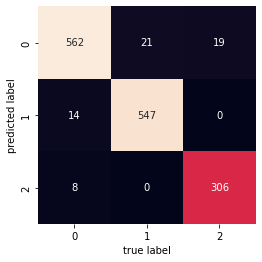

In [36]:
sns.heatmap(cm_KNN.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel('true label')
plt.ylabel('predicted label')

#### Support Vector Machine

In [37]:
from sklearn.svm import SVC

model_SVM = SVC(kernel='linear')


In [38]:
model_SVM.fit(X_train,y_train)
y_pred_SVM = model_SVM.predict(X_test)
y_pred_SVM

array([0, 1, 0, ..., 0, 1, 1])

In [39]:
accuracy_SVM=accuracy_score(y_test, y_pred_SVM)
print(classification_report(y_test, y_pred_SVM))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       584
           1       0.99      1.00      1.00       568
           2       0.99      1.00      0.99       325

    accuracy                           0.99      1477
   macro avg       0.99      0.99      0.99      1477
weighted avg       0.99      0.99      0.99      1477



#### Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion= "entropy",splitter='best',max_depth=None ) 
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [41]:
y_pred_DT=model.predict(X_test)
y_pred_DT


array([0, 1, 0, ..., 0, 1, 1])

In [42]:
accuracy_DT=accuracy_score(y_test, y_pred_DT)
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       584
           1       0.99      0.99      0.99       568
           2       0.99      1.00      1.00       325

    accuracy                           0.99      1477
   macro avg       0.99      0.99      0.99      1477
weighted avg       0.99      0.99      0.99      1477



In [43]:
cm_DT = confusion_matrix(y_test, y_pred_DT)

Text(91.68, 0.5, 'predicted label')

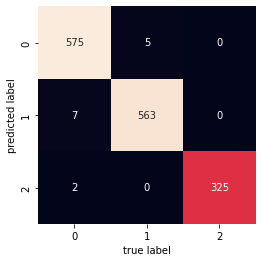

In [44]:
cm_DT = confusion_matrix(y_test, y_pred_DT)
sns.heatmap(cm_DT.T, square=True, annot=True,fmt='d', cbar=False,xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel('true label')
plt.ylabel('predicted label')

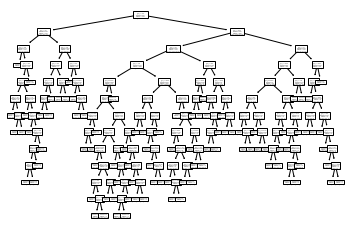

In [45]:
from sklearn import tree
tree.plot_tree(model);

#### Comparing the models' accuracy that build from 3 differnt machine Learning Algorithms.

In [46]:
print("Accuracy of the KNN is {:.2f}%".format(accuracy_KNN*100))
print("Accuracy of the SVM is {:.2f}%".format(accuracy_SVM*100))
print("Accuracy of the Decision Tree model is {:.2f}%".format(accuracy_DT*100))


Accuracy of the KNN is 95.80%
Accuracy of the SVM is 99.39%
Accuracy of the Decision Tree model is 99.05%


In [47]:
#since it is not a binary classification ROC curve is not a best one for performance analysis.

In [48]:
roc_df = pd.DataFrame(zip(y_test, y_pred_KNN, y_pred_SVM,y_pred_DT),columns=['y_test','y_pred_KNN','y_pred_SVM','y_pred_DT'])

In [49]:
roc_df

,y_test,y_pred_KNN,y_pred_SVM,y_pred_DT
0,0,0,0,0
1,1,1,1,1
2,0,0,0,0
3,1,1,1,1
4,0,0,0,0
...,...,...,...,...
1472,2,2,2,2
1473,2,0,2,2
1474,0,0,0,0
1475,1,1,1,1


<Figure size 432x288 with 0 Axes>

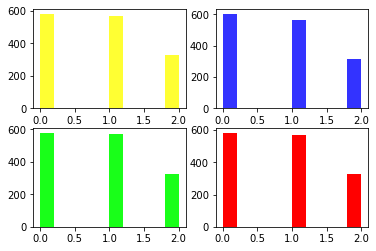

In [50]:
fig = plt.figure()
x = np.linspace(0, 2, 100)
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)

#colors = ['red', 'tan', 'lime']
#labels=['y_test','y_pred_KNN','y_pred_SVM']
#x=[a for a in [roc_df['y_test'],roc_df['y_pred_KNN'],roc_df['y_pred_SVM']]]
# Make a multiple-histogram of data-sets with different length.
#x_multi = [np.range(2) for n in [roc_df['y_test'], roc_df['y_pre_KNN']]]
#ax3.hist(x_multi, n_bins, histtype='bar')
ax0.hist(roc_df['y_pred_DT'],label='y_pred_DT',alpha=0.8,color='yellow')
ax1.hist(roc_df['y_pred_KNN'],label='y_pred_KNN',alpha=0.8,color='blue')
ax2.hist(roc_df['y_pred_SVM'],label='y_pred_SVM',alpha=0.9,color='lime')
ax3.hist(roc_df['y_test'],label='True_value',color='red')

ax.legend()

